In [1]:
import pandas as pd
import numpy as np
import cv2 as cv

In [2]:
path = 'D:/Image Classification Self/Data/A-Z English Characters Recognition/A_Z Handwritten Data/'

In [3]:
names = ['label']
for i in range(0, 784):
    names.append(str(i))

In [4]:
dataset = pd.read_csv(path + 'A_Z Handwritten Data.csv', names=names)

In [5]:
dataset.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
images = dataset.iloc[:, 1:]
labels = dataset.iloc[:, 0]

In [7]:
images.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [9]:
images = np.array(images).reshape((len(images), 28, 28))
labels = np.array(labels)

0


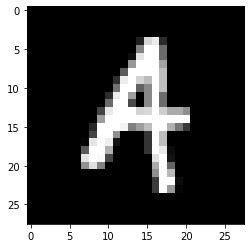

In [10]:
import matplotlib.pyplot as plt

print(labels[0])
plt.imshow(images[0], cmap='gray')

1


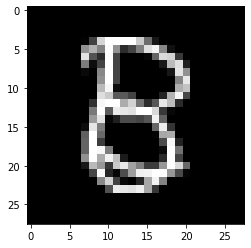

In [11]:
print(labels[20000])
plt.imshow(images[20000], cmap='gray')

3


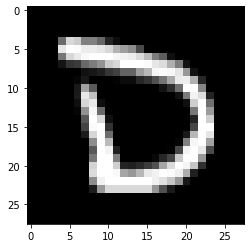

In [12]:
print(labels[50000])
plt.imshow(images[50000], cmap='gray')

In [13]:
images = images.reshape((images.shape[0], 28, 28, 1))

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.1, random_state=123)

In [16]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(335205, 28, 28, 1) (37246, 28, 28, 1) (335205, 26) (37246, 26)


In [17]:
del images
del labels

In [18]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, Dropout, MaxPooling2D, Input, ZeroPadding2D
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential()
model.add(Input((28, 28, 1)))
model.add(ZeroPadding2D((2,2)))

model.add(Conv2D(6, (5,5), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(16, (5,5), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())
model.add(Dense(120, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(84, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(26, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, Y_train_req, validation_split=0.1, epochs=20, batch_size=128)

Train on 301684 samples, validate on 33521 samples
Epoch 1/20
301684/301684 [==============================] - 23s 77us/sample - loss: 0.1737 - accuracy: 0.9505 - val_loss: 0.0687 - val_accuracy: 0.9796
Epoch 2/20
301684/301684 [==============================] - 20s 67us/sample - loss: 0.0652 - accuracy: 0.9807 - val_loss: 0.0574 - val_accuracy: 0.9823
Epoch 3/20
301684/301684 [==============================] - 21s 70us/sample - loss: 0.0476 - accuracy: 0.9856 - val_loss: 0.0457 - val_accuracy: 0.9853
Epoch 4/20
301684/301684 [==============================] - 22s 74us/sample - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0440 - val_accuracy: 0.9864
Epoch 5/20
301684/301684 [==============================] - 23s 77us/sample - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0353 - val_accuracy: 0.9893
Epoch 6/20
301684/301684 [==============================] - 24s 78us/sample - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0423 - val_accuracy: 0.9872
Epoch 7/20
301684/301684 [===========

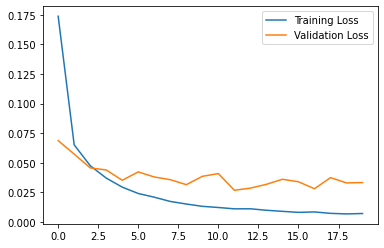

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

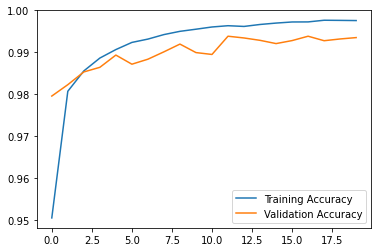

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

In [25]:
model.evaluate(X_test, Y_test_req)

37246/37246 [==============================] - 6s 161us/sample - loss: 0.0306 - accuracy: 0.9941


[0.03058309337880647, 0.994147]

In [26]:
model.save('D:/Image Classification Self/Data/A-Z English Characters Recognition/A_Z Handwritten Data/A_Z_English_character_recognition_LeNet5.h5')